# Green Shift: Denmark's Energy Path

***02806 Social Data Analysis and Visualization***

**Authors**:
* Diogo Carvalho, s233176
* Matteo Piccagnoni, s232713
* Davide Giuffrida, s233204

## How to read this notebook

> We have subdivided this notebook in sections as requested by the project description. 

## Imports and variables

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
from urllib.request import urlopen
import json
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, CustomJS
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, CustomJS, Slider
from bokeh.layouts import column
from bokeh.models import HoverTool

In [ ]:
plt.style.use("fivethirtyeight")

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Ubuntu"
plt.rcParams["font.monospace"] = "Ubuntu Mono"
plt.rcParams["font.size"] = 10
plt.rcParams["axes.labelsize"] = 10
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["xtick.labelsize"] = 8
plt.rcParams["ytick.labelsize"] = 8
plt.rcParams["legend.fontsize"] = 10
plt.rcParams["figure.titlesize"] = 12

# Renders the plot within the Jupyter notebook
output_notebook()

Loading BokehJS ...

## 1. Motivation

- **What is your dataset?**

> The dataset comprises information from reputable sources such as Eurostat, Statistics Denmark, and Our World in Data. It encompasses data related to renewable energy adoption, economic impact, policy responses, and sustainability efforts in Denmark and other European countries.

- **Why did you choose this/these particular dataset(s)?**

> As foreign students in Denmark, gaining a deeper understanding of how the country navigates its socio-economic and environmental challenges is crucial for us. We chose datasets from Eurostat, Statistics Denmark, and Our World in Data because they provide a reliable and comprehensive view not just of Denmark’s environmental policies, but also of its economic impacts and broader sustainability efforts. These datasets allow for a nuanced analysis of Denmark's strategies in renewable energy adoption alongside socio-economic indicators, offering a more holistic view of how these strategies align with or impact other sectors. This choice enables us to engage more deeply with the country’s policy landscape and informs our perspective on living and studying in an environment that prioritizes sustainability and innovation.

- **What was your goal for the end user's experience?**

> Our goal for the end user's experience is to create an engaging, smooth, and informative website with interactive graphs that effectively communicate our analysis of Denmark's green energy and sustainability efforts. We aim to provide users with a user-friendly interface that allows them to explore data trends, compare Denmark's performance with other European countries, understand the economic and environmental impacts of renewable energy adoption, and interact with the visualization to have a more personalized experience. We want to empower users to gain insights into Denmark's pioneering strategies for sustainable living and inspire action towards a greener future.

## 2. Basic stats

- **Write about your choices in data cleaning and preprocessing?**

> The data come from different and reliable sources: [Our World in Data](https://ourworldindata.org/), [Statistic Denmark](https://www.dst.dk/en), and [Eurostat](https://ec.europa.eu/eurostat). 
>
> In the data preprocessing, we integrated multiple tables to meet the requirements of the project. We filtered the data specifically for European countries, with a particular focus on Denmark. This selective approach was taken to align with our analysis and narrative, which primarily revolves around Denmark and its comparison with other European nations. The data were additional filtered based on year, starting from 2000 onwards. Certainly, this value varies from plot to plot as it is higly dependant on the available data and purpose of the plot. We will now detail some of the most relevant data cleaning procedures we have performed. You can see the precise code in later sections. 
>
> For the analysis of **Denmark's GDP** throughout the years we opted to show a trend line which aids the viewer in properly understanding whether this value has been really increasing or decreasing. We created this line directly from code by fitting a Linear Regression model to the data and visualizing the obtained line. 
> 
> In processing the **air quality** table, we grouped the data by month to derive monthly averages for air quality, facilitating the creation of a line chart with a trend line. This was created in the same fashion as detailed in the previous paragraph. Furthermore, to address missing values (NaN), we used interpolation, substituting the missing values with averages from the preceding and succeeding months. Additionally, we observed a gap in the data spanning approximately five months (from June 2017 to November 2017). To solve this, we performed further interpolation for these months to ensure accurate values and achieve a smoother graph. While this procedure eliminated a small portion of data variability, it still aided in our purpose as the timespan was relatively insignifcant and the visualisation was much enhanced. 
>
> For a detailed overview of our data processing and cleaning procedures, please refer to Section 3 below.

- **Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis.**

> ...

## 3. Data analysis

- **Describe your data analysis and explain what you've learned about the dataset. If relevant, talk about your machine-learning.**


> As mentioned in the previous section one of the most interesting way we have enhanced some of our visualizations was the creation of the trend line. This line was created by fitting a Linear Regression model to the data and plotting it by extrapolating its coefficients. This process was relatively straightforward and it provides us with a clear discussion point about the visualization. 

> Apart from the models detailed above, we have not utilized other machine learning algorithms as we did not deem them useful for our visualizations. This was also due to the fact that we have not worked with a unified dataset, but a combination of tables found from different websites. These were already quite specific so no further data analysis was required. We instead decided to focus primarily on the combination of said tables and the quality of the plots themselves. 

### 3.1 Greenhouse gas emissions by country

> In this subsection, we will explore the greenhouse gas emissions data from different countries, focusing specifically on data from the year 2000 onwards and targeting European nations. Our analysis will begin by examining the structure and key characteristics of the dataset provided by [Our World in Data](https://ourworldindata.org/greenhouse-gas-emissions). 
> 
> We will conduct a detailed exploration of the data, involving filtering the dataset to concentrate on European countries, creating a pivot table to facilitate easier comparison across years, and finally, exporting the refined data for further use and analysis.

#### Import

In [ ]:
df = pd.read_csv("./global_emissions_total.csv")

#### Understand the data

In [ ]:
# shape
df.shape

(37195, 4)

In [ ]:
# columns
df.columns

Index(['Entity', 'Code', 'Year',
       'Annual greenhouse gas emissions in CO₂ equivalents'],
      dtype='object')

In [ ]:
# summary statistics
df.describe()

,Year,Annual greenhouse gas emissions in CO₂ equivalents
count,37195.000000,3.719500e+04
mean,1936.000000,4.812280e+08
std,49.940635,2.347735e+09
min,1850.000000,-4.547971e+06
25%,1893.000000,1.890863e+06
50%,1936.000000,1.469790e+07
75%,1979.000000,7.788846e+07
max,2022.000000,5.385116e+10


#### Cleaning and Filtering

In [ ]:
# filter by year >= 2000
df_from_2000 = df[df["Year"] >= 2000].reset_index(drop=True)

In [ ]:
# filter by the european countries only
european_countries = [
    "Albania",
    "Andorra",
    "Armenia",
    "Austria",
    "Azerbaijan",
    "Belarus",
    "Belgium",
    "Bosnia and Herzegovina",
    "Bulgaria",
    "Croatia",
    "Cyprus",
    "Czech Republic",
    "Denmark",
    "Estonia",
    "Finland",
    "France",
    "Germany",
    "Georgia",
    "Greece",
    "Hungary",
    "Iceland",
    "Ireland",
    "Italy",
    "Latvia",
    "Liechtenstein",
    "Lithuania",
    "Luxembourg",
    "Malta",
    "Moldova",
    "Monaco",
    "Montenegro",
    "Netherlands",
    "North Macedonia",
    "Norway",
    "Poland",
    "Portugal",
    "Romania",
    "San Marino",
    "Serbia",
    "Slovakia",
    "Slovenia",
    "Spain",
    "Sweden",
    "Switzerland",
    "Turkey",
    "Ukraine",
    "United Kingdom",
    "Vatican City"
]

df_europe_from_2000 = df_from_2000[df_from_2000["Entity"].isin(european_countries)].reset_index(drop=True)

In [ ]:
df_europe_from_2000.head()

,Entity,Code,Year,Annual greenhouse gas emissions in CO₂ equivalents
0,Albania,ALB,2000,6823153.5
1,Albania,ALB,2001,6972113.0
2,Albania,ALB,2002,7476225.0
3,Albania,ALB,2003,8287149.0
4,Albania,ALB,2004,7693972.5


#### Pivot

In [ ]:
df_europe_pivot_from_2000 = df_europe_from_2000.pivot(
  index='Entity',
    columns='Year',
    values='Annual greenhouse gas emissions in CO₂ equivalents',
)
df_europe_pivot_from_2000 = df_europe_pivot_from_2000.reset_index()

df_europe_pivot_from_2000.head()

Year,Entity,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Albania,6823153.5,6972113.0,7476225.00,8287149.0,7693972.5,9062968.0,8137700.00,8959703.0,9551439.0,...,9441338.00,10226878.0,9166668.0,8819070.00,9530445.0,8901102.0,8549947.0,8438481.0,8077409.00,8034590.50
1,Andorra,679078.7,680339.9,689972.25,695759.0,722838.4,739627.1,704623.06,694276.6,688835.2,...,604878.44,587470.0,589425.9,592965.06,589737.4,618268.0,606122.0,492249.9,484959.84,482078.66
2,Armenia,6319167.5,6965931.0,6958924.50,7462185.5,8549841.0,10663547.0,9743804.00,9629689.0,9854290.0,...,9318625.00,9268561.0,9244813.0,9451610.00,9246954.0,9339961.0,9628735.0,10088171.0,10339451.00,9655818.00
3,Austria,75275880.0,79152790.0,80792370.00,87597544.0,86467150.0,87583040.0,85321200.00,82976936.0,82721770.0,...,75951000.00,71922130.0,73632300.0,74552110.00,76979870.0,73716000.0,75020190.0,69069670.0,73148264.00,68350050.00
4,Azerbaijan,43875056.0,42624900.0,42571516.00,44554864.0,46609700.0,49713012.0,51107704.00,51204708.0,56980080.0,...,57198050.00,58598628.0,60215556.0,61457564.00,59594444.0,60587220.0,66128540.0,65383680.0,69963430.00,70603160.00


#### Analysis

- Line chart overtime denmark vs. average europe

findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were foun

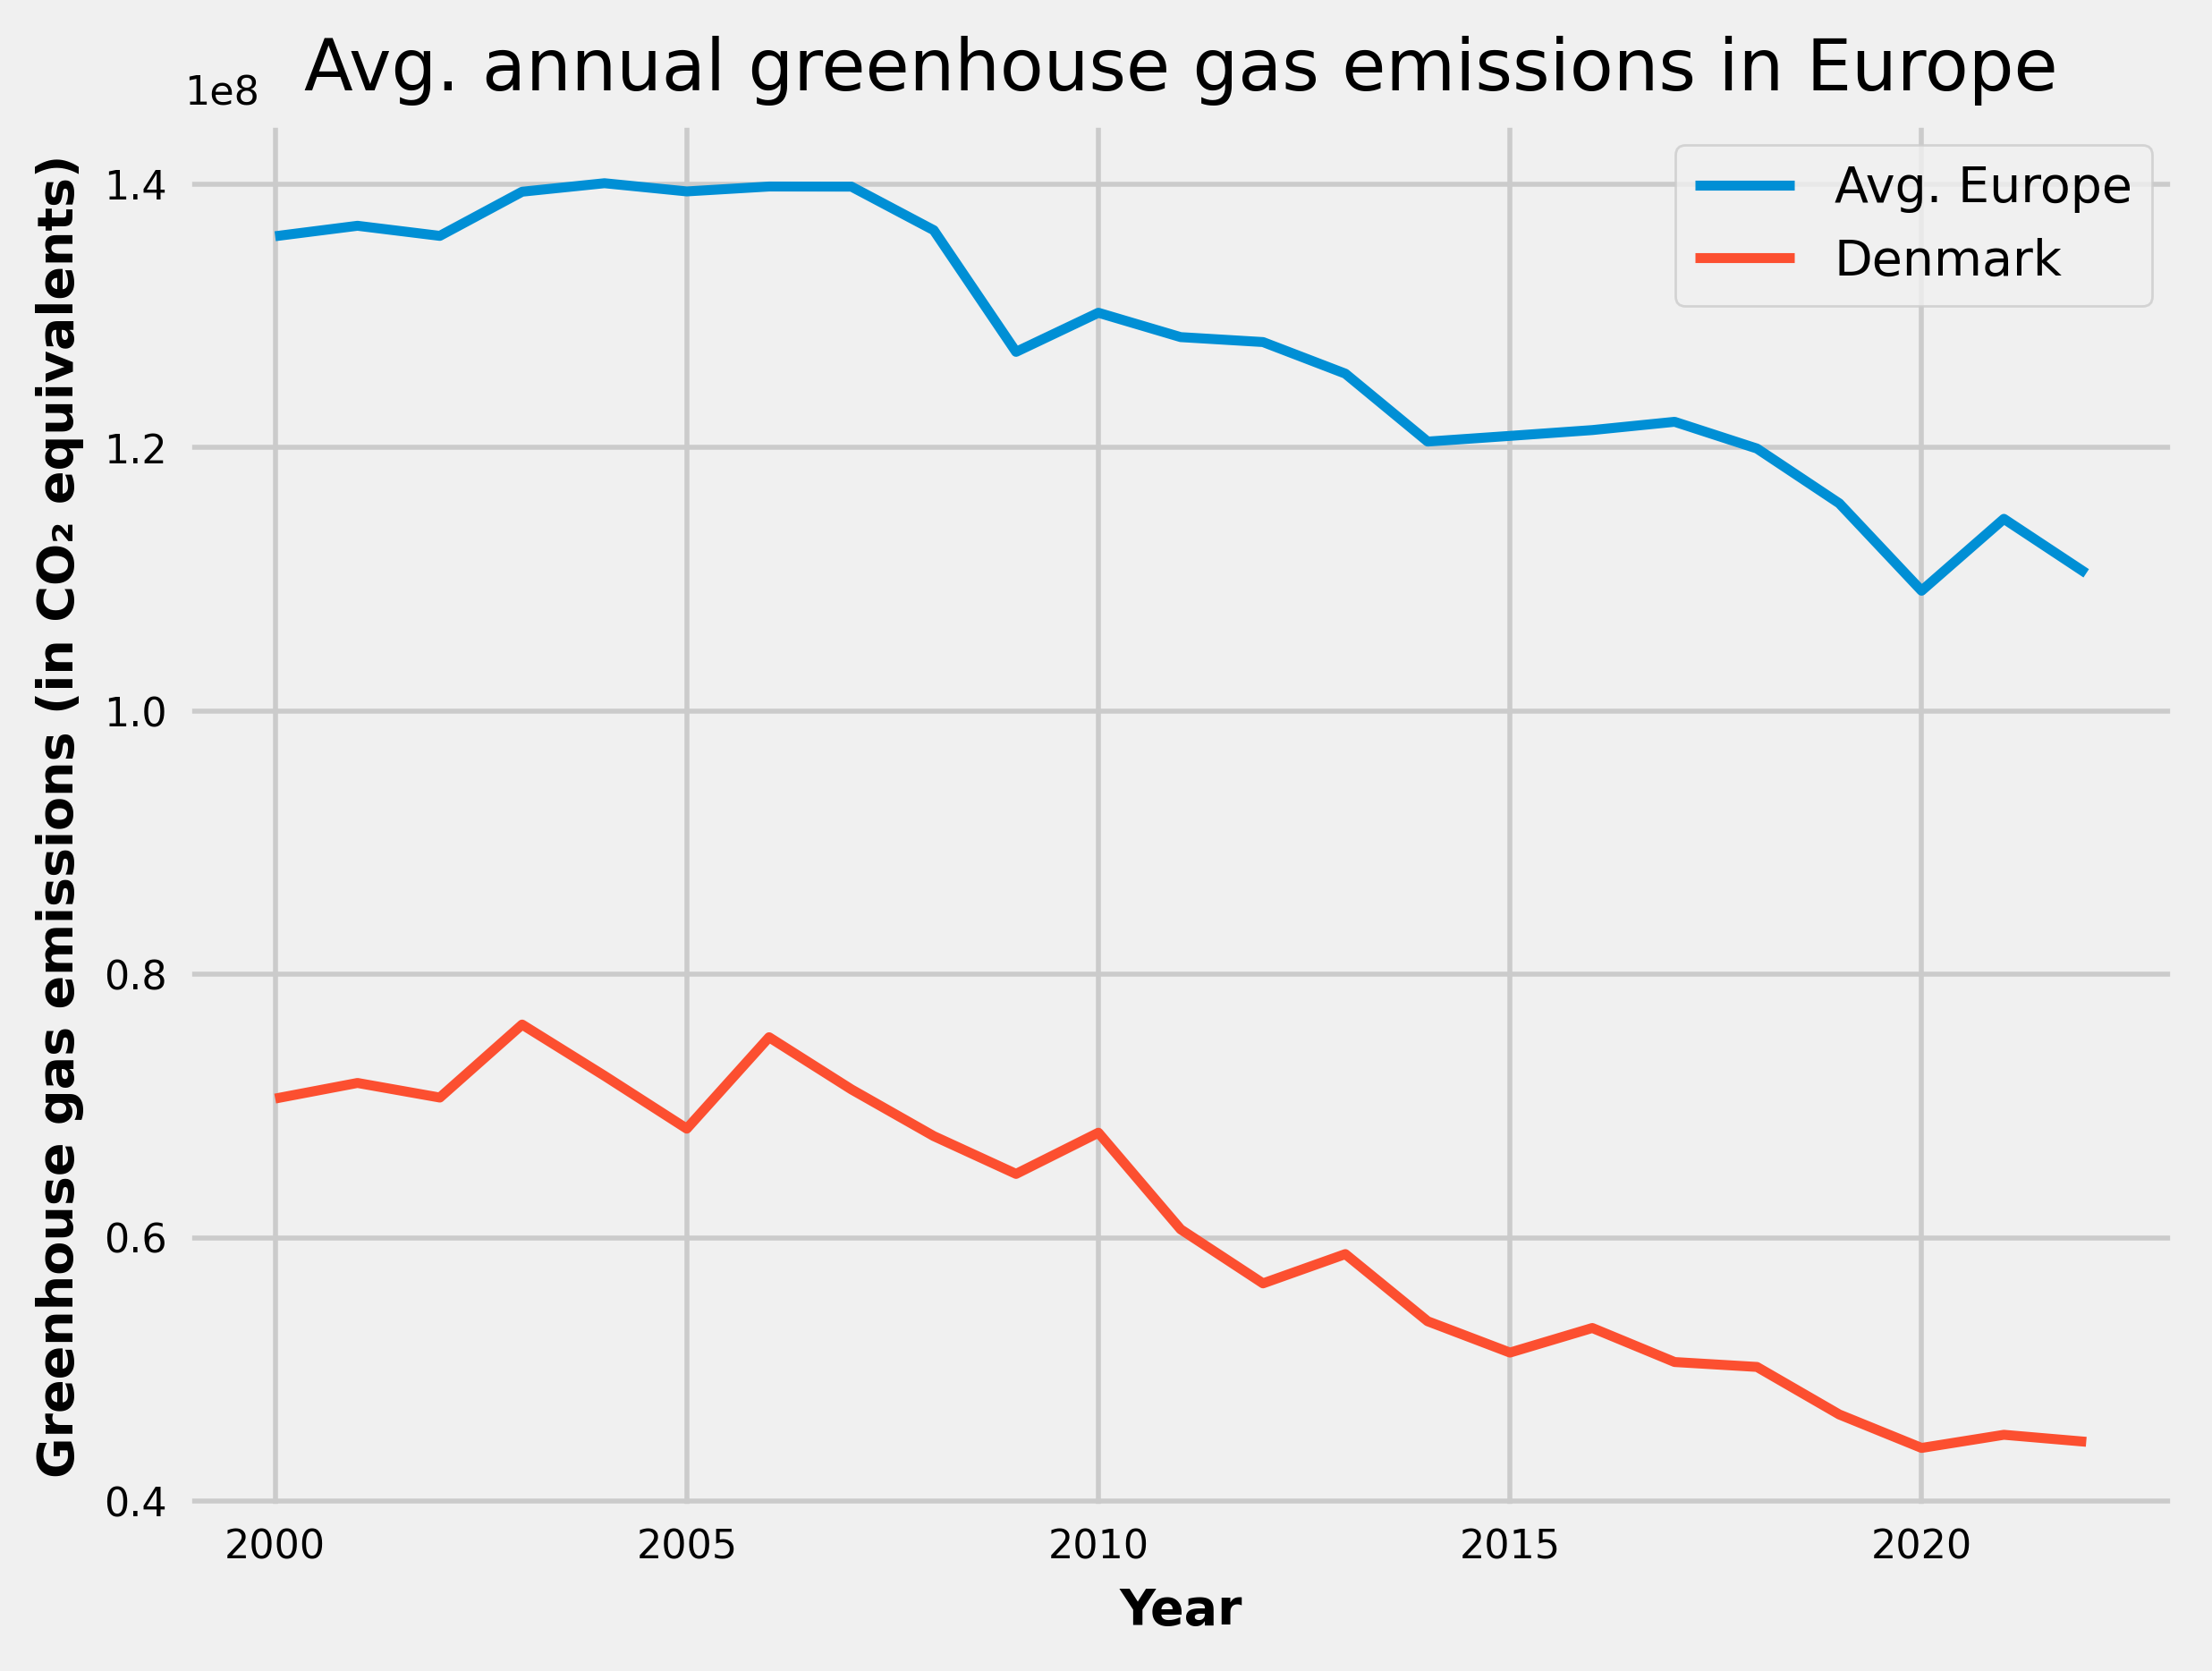

In [ ]:
# Denmark 
denmark_emissions = df_europe_pivot_from_2000[df_europe_pivot_from_2000['Entity'] == 'Denmark'].drop('Entity', axis=1).T

# Calculate the average emissions per year across all European countries
average_emissions = df_europe_pivot_from_2000.drop('Entity', axis=1).mean()

fig, ax = plt.subplots(dpi=400)
average_emissions.plot(ax=ax, linewidth=2)
denmark_emissions.plot(ax=ax, linewidth=2, label='Denmark')
ax.set_title("Avg. annual greenhouse gas emissions in Europe")
ax.set_xlabel("Year")
ax.set_ylabel("Greenhouse gas emissions (in CO₂ equivalents)")
plt.legend(["Avg. Europe", "Denmark"])
plt.show()

> **Key insights**:
> - Both Denmark and Europe show a decline in emissions since 2000, with Denmark having a more pronounced and consistent reduction.
> - Denmark consistently reports lower emissions than the European average, highlighting its effective environmental policies.
> - Denmark's strategies in reducing emissions, likely involving robust sustainability policies, could serve as a model for other European countries to achieve similar results.
> - Continuing current trends, Denmark could set a benchmark in sustainability, while other European countries might need to intensify their efforts to meet international climate goals.

- Choropleth map to understand each country individually

In [ ]:
df_long = df_europe_from_2000.melt(
    id_vars=["Entity", "Year"],
    value_vars="Annual greenhouse gas emissions in CO₂ equivalents",
    var_name="Metric",
    value_name="Value",
)

# load europe Geo
with urlopen(
"https://raw.githubusercontent.com/leakyMirror/map-of-europe/master/GeoJSON/europe.geojson"
) as response:
    europe_geo = json.load(response)


# Assuming df_long is already created and formatted correctly
fig = px.choropleth_mapbox(
    df_long,
    locations="Entity",
    color="Value",
    animation_frame="Year",
    hover_name="Entity",
    range_color=[df_long["Value"].min(), df_long["Value"].max()],
    mapbox_style="carto-positron",
    color_continuous_scale="Viridis",
    geojson=europe_geo,
    featureidkey="properties.NAME",
    center={"lat": 51.1657, "lon": 10.4515},
    zoom=2,
    labels={"Value": "CO₂"},
)
fig.update_layout(
    title={
        "text": "Annual greenhouse gas emissions CO₂ equivalents",
        "y": 0.97,
        "x": 0.5,
        "xanchor": "center",
        "yanchor": "top",
    },
)

# Show the figure
fig.show()

OutputSizeExceededError: The output cannot be displayed as it exceeds Deepnote's 30MB limit for outputs. The limit is in place to ensure smooth performance.

Please reduce the amount of data being sent to the output.

> **Key insights**:
> - There is an overall reduction in emissions across many European countries from 2000 to 2022. This change is consistent with global efforts to reduce greenhouse gas outputs in response to climate change concerns.
> - In 2000, countries like Germany, the UK, and France showed relatively higher emissions, indicated by darker shades on the map. By 2022, these countries exhibit lighter shades, indicating a significant reduction in emissions.
> - The maps suggest that European environmental policies and initiatives such as the European Green Deal may be having a positive impact, but the variation in emission levels across the continent underscores the need for more unified and stringent enforcement.

#### Export

In [ ]:
df_europe_pivot_from_2000.to_csv("./global_emissions_europe_2000.csv", index=False)

### 3.2 Share of energy from renewable sources

> This subsection analyzes the share of energy from renewable sources in European countries, using data from [Eurostat](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Renewable_energy_statistics#Share_of_renewable_energy_more_than_doubled_between_2004_and_2022). Our focus is on trends from 2005 to present, emphasizing the growth in renewable energy adoption. The analysis includes data preparation, enhanced visualizations, and integration of country-specific information. This provides a clear view of each country's progress towards sustainable energy goals.

#### Import

In [ ]:
df_eurostat = pd.read_excel(
    "./renewable_energy_stats.xlsx", sheet_name="Table 1", skiprows=3
)

#### Understand the data

In [ ]:
df_eurostat.head()

,Unnamed: 0,Unnamed: 1,2004,2005,2006,2007,2008,2009,2010,2011,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,NaN,EU,9.604989,10.181582,10.778381,11.748671,12.551783,13.850348,14.405324,14.546641,...,16.659094,17.415867,17.819696,17.978481,18.411286,19.096097,19.88704,22.037648,21.925708,23.019673
1,NaN,Belgium,1.916442,2.324783,2.657943,3.140169,3.610993,4.746488,6.004215,6.302146,...,7.671398,8.037977,8.060039,8.743748,9.135854,9.471854,9.928942,13.000248,13.006742,13.759295
2,NaN,Bulgaria,9.230635,9.172932,9.415388,9.097631,10.344928,12.005282,13.927464,14.151582,...,18.897668,18.049891,18.26111,18.760193,18.694713,20.580967,21.545489,23.319154,19.446859,19.095279
3,NaN,Czechia,6.772963,7.113168,7.361807,7.895076,8.673508,9.97738,10.513249,10.945207,...,13.927439,15.073918,15.069623,14.925639,14.798981,15.139469,16.238905,17.303447,17.670513,18.194646
4,NaN,Denmark,14.839057,15.955052,16.331896,17.746679,18.542836,19.947759,21.887705,23.388698,...,27.173444,29.309917,30.468884,31.714785,34.387382,35.159496,37.019927,31.680763,41.008859,41.601485


In [ ]:
# drop 1st col
df_eurostat = df_eurostat.drop(df_eurostat.columns[0], axis=1)

# drop rows after 37
df_eurostat = df_eurostat.drop(df_eurostat.index[37:])

# rename first column
df_eurostat = df_eurostat.rename(columns={df_eurostat.columns[0]: "Location"})

# remove * from names
df_eurostat["Location"] = df_eurostat["Location"].str.replace("*", "")

# replace : in values with NaN
df_eurostat = df_eurostat.replace(":", np.nan)

# chage numeric columns to float except Location
numeric_cols = df_eurostat.columns[1:]
df_eurostat[numeric_cols] = df_eurostat[numeric_cols].apply(pd.to_numeric, errors='coerce')

# use interpolation to fill missing values where possible
df_eurostat[numeric_cols] = df_eurostat[numeric_cols].interpolate(method='linear', axis=1)

# fill remaining missing values with mean for each row
df_eurostat[numeric_cols] = df_eurostat[numeric_cols].apply(lambda x: x.fillna(x.mean()), axis=1)

#### Complement Dataset with Country Flag

In [ ]:
# get iso code from country name eurostat
with urlopen(
    "https://r2.datahub.io/clt98ab600006l708tkbrtzel/master/raw/data.csv"
) as response:
    countries = pd.read_csv(response)

# rename column to standardize
countries = countries.rename(columns={"Name": "Location"})

# merge the datasets
df_eurostat = pd.merge(df_eurostat, countries, on="Location", how="left")

# add the image url based on the same url + iso code
df_eurostat["ImageURL"] = (
    "https://public.flourish.studio/country-flags/svg/" + df_eurostat["Code"] + ".svg"
)

# check null
df_eurostat[df_eurostat["Code"].isnull()]

# fix the null countries
manual_mapping = {
  "Czechia": "CZ",
  "Bosnia Herzegovina": "BA",
  "North Macedonia": "MK",
  "Kosovo": "XK",
  "Moldova": "MD",
}
for key, value in manual_mapping.items():
    df_eurostat.loc[df_eurostat["Location"] == key, "Code"] = value
    df_eurostat.loc[df_eurostat["Location"] == key, "ImageURL"] = (
        "https://public.flourish.studio/country-flags/svg/" + value + ".svg"
    )

In [ ]:
# convert column names to string
df_eurostat.columns = df_eurostat.columns.astype(str)

In [ ]:
df_eurostat

,Location,2004,2005,2006,2007,2008,2009,2010,2011,2012,...,2015,2016,2017,2018,2019,2020,2021,2022,Code,ImageURL
0,EU,9.604989,10.181582,10.778381,11.748671,12.551783,13.850348,14.405324,14.546641,16.002162,...,17.819696,17.978481,18.411286,19.096097,19.887040,22.037648,21.925708,23.019673,NaN,NaN
1,Belgium,1.916442,2.324783,2.657943,3.140169,3.610993,4.746488,6.004215,6.302146,7.085930,...,8.060039,8.743748,9.135854,9.471854,9.928942,13.000248,13.006742,13.759295,BE,https://public.flourish.studio/country-flags/s...
2,Bulgaria,9.230635,9.172932,9.415388,9.097631,10.344928,12.005282,13.927464,14.151582,15.836640,...,18.261110,18.760193,18.694713,20.580967,21.545489,23.319154,19.446859,19.095279,BG,https://public.flourish.studio/country-flags/s...
3,Czechia,6.772963,7.113168,7.361807,7.895076,8.673508,9.977380,10.513249,10.945207,12.813679,...,15.069623,14.925639,14.798981,15.139469,16.238905,17.303447,17.670513,18.194646,CZ,https://public.flourish.studio/country-flags/s...
4,Denmark,14.839057,15.955052,16.331896,17.746679,18.542836,19.947759,21.887705,23.388698,25.465142,...,30.468884,31.714785,34.387382,35.159496,37.019927,31.680763,41.008859,41.601485,DK,https://public.flourish.studio/country-flags/s...
5,Germany,6.206808,7.167114,8.465976,10.038955,10.071549,10.851355,11.667219,12.470070,13.548844,...,14.901155,14.884790,15.472277,16.660271,17.266354,19.089984,19.395216,20.796103,DE,https://public.flourish.studio/country-flags/s...
6,Estonia,18.420074,17.477611,16.010976,17.138707,18.810753,23.009321,24.574737,25.515298,25.586166,...,28.987018,29.232052,29.538084,29.969790,31.729683,30.069384,37.442303,38.471758,EE,https://public.flourish.studio/country-flags/s...
7,Ireland,2.377596,2.821511,3.073498,3.496588,3.979138,5.243378,5.755323,6.604565,7.028898,...,9.083127,9.188946,10.520308,10.941819,11.978704,16.160239,12.376080,13.107188,IE,https://public.flourish.studio/country-flags/s...
8,Greece,7.161259,7.277087,7.457756,8.248712,8.183239,8.730624,10.077325,11.152675,13.741266,...,15.690280,15.390467,17.299615,18.001024,19.632625,21.749078,22.017305,22.678068,GR,https://public.flourish.studio/country-flags/s...
9,Spain,8.344547,8.444379,9.155835,9.666744,10.743936,12.957741,13.781771,13.176240,14.238858,...,16.220963,17.014633,17.118333,17.022566,17.851832,21.219517,20.735772,22.116359,ES,https://public.flourish.studio/country-flags/s...


#### Analysis

- Bar chart of each country by year in terms of share renewable energy

In [ ]:
# Set colors
colors = ['#FF2700' if loc == 'Denmark' else '#008FD5' for loc in df_eurostat['Location']]

# Prepare ColumnDataSource including all years and initializing 'y'
source = ColumnDataSource(data={
    'y': df_eurostat['Location'],  # 'y' will now represent the categorical locations
    'right': df_eurostat['2022'],  # Initialize 'right' with the latest year
    'colors': colors,
    **{str(year): df_eurostat[str(year)] for year in range(2005, 2023)}  # Ensure years are strings
})

# Create a plot with horizontal orientation
p = figure(y_range=df_eurostat['Location'], title="Share of Renewable Energy Consumption",
           toolbar_location=None, tools="")

# Add a horizontal bar renderer
renderer = p.hbar(y='y', right='right', height=0.9, color='colors', source=source)

# Add HoverTool to display values on hover
hover = HoverTool(renderers=[renderer], tooltips=[
    ("Country", "@y"),  
    ("Share of Renewable Energy Consumption", "@right%")
])
p.add_tools(hover)

# Add slider to change year
slider = Slider(start=2005, end=2022, value=2022, step=1, title="Year")

# JavaScript callback function to update the 'right' values based on the slider
callback = CustomJS(args={'source': source, 'slider': slider}, code="""
    const data = source.data;
    const year = slider.value.toString();
    data['right'] = data[year];  // Update the 'right' attribute to reflect the selected year
    source.change.emit();
""")

slider.js_on_change('value', callback)

# Layout with the slider and plot
layout = column(slider, p)

# Show plot
show(layout)

> **Key insights**:
> - There has been a general increase in renewable energy consumption across many European countries from 2005 to 2022.
> - Nordic countries like Iceland and Sweden consistently rank high in terms of renewable energy use.
> - Countries like Norway and Albania have maintained a high share of renewable energy consumption throughout the period.
> - Denmark has always been above the EU average, and has had a steady increment each year.

- Line chart of denmark

findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were foun

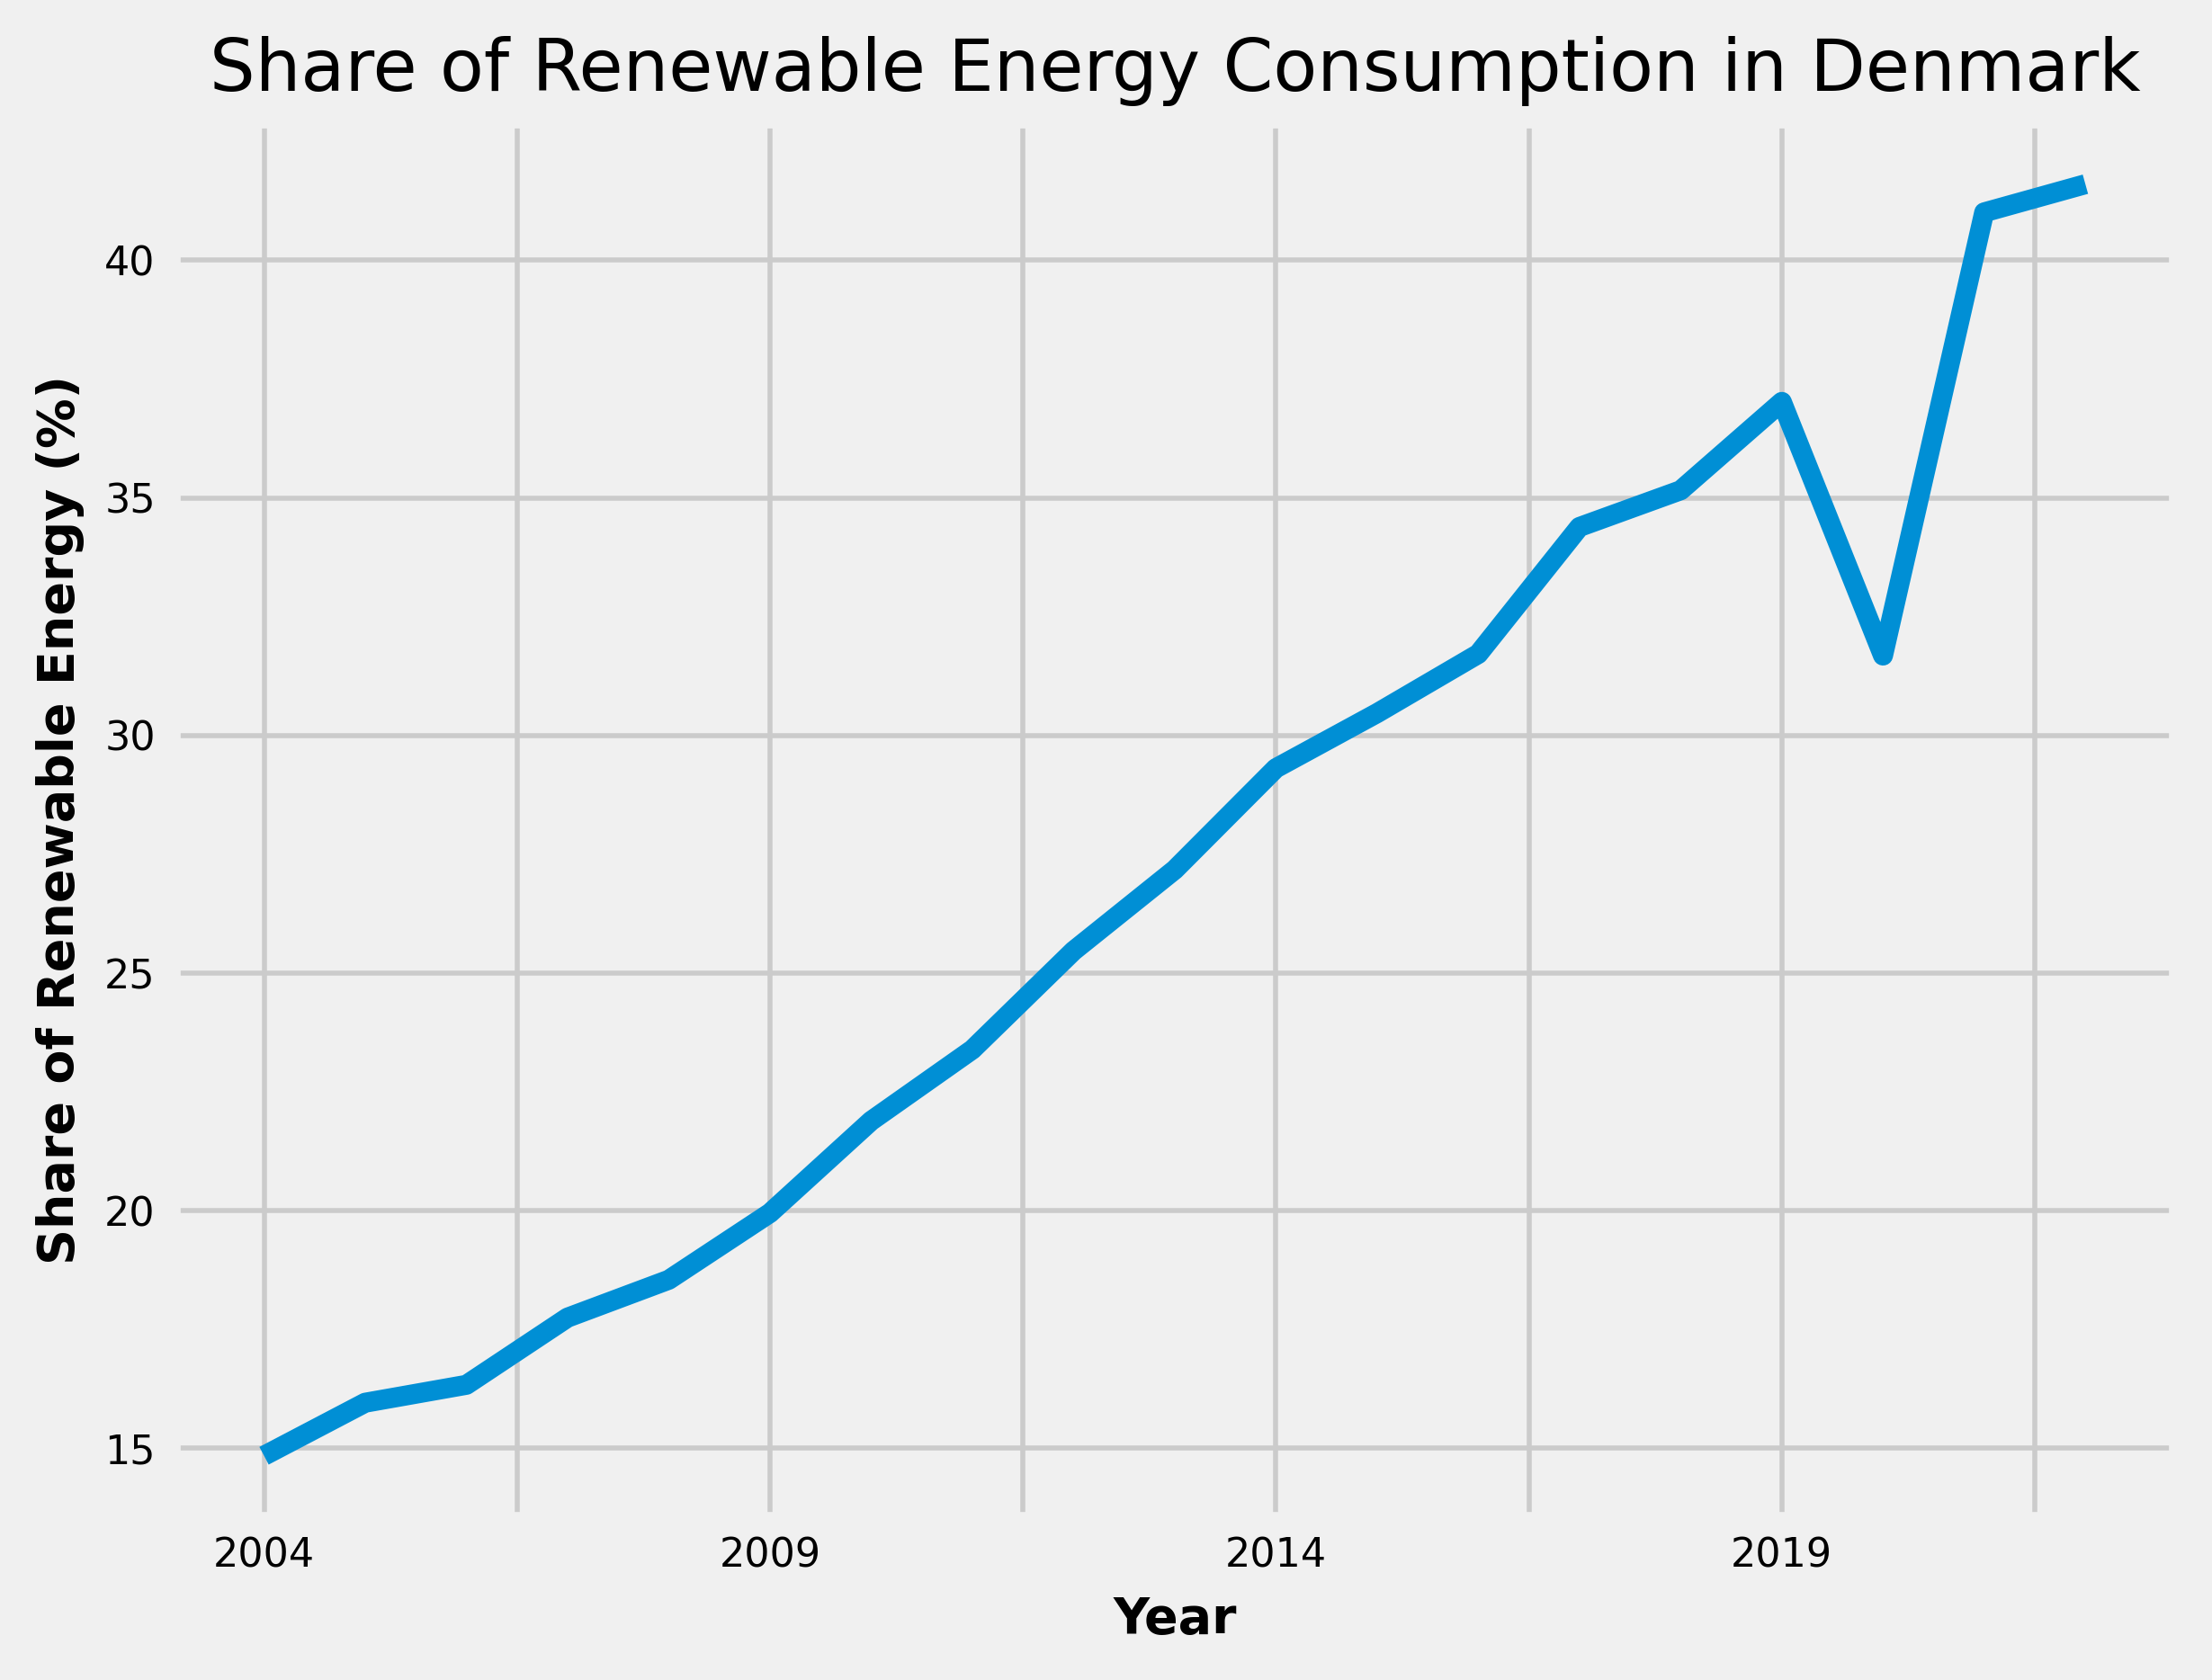

In [ ]:
denmark_all_years = df_eurostat[df_eurostat['Location'] == 'Denmark']

denmark_numeric = denmark_all_years.drop(columns=['Location', 'Code', 'ImageURL'])

# Transpose the DataFrame to get years as rows, which makes plotting easier
denmark_transposed = denmark_numeric.T

# Rename the column for clarity in plotting
denmark_transposed.columns = ['Share of Renewable Energy Consumption']

# Now plot
fig, ax = plt.subplots(dpi=400)
denmark_transposed.plot(kind='line', ax=ax, legend=False)  # Set legend to False as we have only one data series
ax.set_title("Share of Renewable Energy Consumption in Denmark")
ax.set_xlabel("Year")
ax.set_ylabel("Share of Renewable Energy (%)")

plt.show()

> **Key insights**:
> - It is more clear here the steadily increase in Denmark's renewable energy consumption from 2004, starting at around 15%, and reaching above 40% by 2019.
> - Around 2019, there's a noticeable dip in the share of renewable energy. This might reflect temporary fluctuations due to the pandemic or other external factors.
> - After the dip in 2019, the share of renewable energy rebounds sharply, suggesting a quick recovery and a resilient energy strategy that supports sustainable growth.
> - The overall trend underscores Denmark's long-term commitment to increasing renewable energy usage, aligning with its environmental policies and objectives to reduce reliance on fossil fuels and combat climate change.

#### Export

In [ ]:
#  export final dataset
df_eurostat.to_csv("./eurostat_renewable_energy_cleaned.csv", index=False)

### 3.3 GDP and trend

> In this section, we will be creating the column for the trend line of the GDP growth plot. Since the plot presents much variability it was interesting to display if the overall GDP had been growing or shrinking over the analyzed years. To do this we will display the trendline of the data which is nothing more than a simple Linear Regression applied to the entire table. We then extract the coefficients required and create a new column detailing the precise values of the fitted line for each considered period.

#### Import

In [ ]:
excel_file = 'project data/GDP.xlsx'
df = pd.read_excel(excel_file)


KeyboardInterrupt



#### Creating the trend line

In [ ]:
quarters_numeric = np.arange(len(df)).reshape(-1, 1)
gdp_values = df['Economic Growth (GDP)'].values
model = LinearRegression()
model.fit(quarters_numeric, gdp_values)
fitted_gdp = model.predict(quarters_numeric)
df['Fitted GDP'] = fitted_gdp
print(df)

#### Export

In [ ]:
df.to_excel('project data/final tables/fitted-gdp.xlsx', index=False)

#### Simple plot

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Quarters'], df['Economic Growth (GDP)'], label='Economic Growth (GDP)')
plt.plot(df['Quarters'], df['Fitted GDP'], linestyle='--', label='Fitted GDP')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('Economic Growth vs Fitted GDP')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### 3.4 Energy consumption by source

> In this section we will obtain the table required to visualize the stacked line chart of energy consumption in Denmark by year. This plot will offer greater insight into how Danish people consume electricity and how this varies throughout the years.
>
> When it comes to data cleaning, in this case we simply isolated Denmark as a country. We then reduced the timespan to consider only the observations after the year 2000.
>
> Finally, we drop the "Nuclear consumption" column since the column is entirely filled with zeros. This is expected as Denmark does not own Nuclear power plants after a resolution passed in the Danish parliament forbidding their development ([World Nuclear Association](https://www.world-nuclear.org/information-library/country-profiles/countries-a-f/denmark.aspx))

#### Import

In [ ]:
df = pd.read_csv('project data/energy-consumption-by-source-and-country.csv')

#### Cleaning

In [ ]:
df = df.loc[df['Entity'] == 'Denmark']
print(df.columns)

In [ ]:
df = df.loc[df['Year'] >= 2000]
df = df.drop(columns=['Code'])

In [ ]:
print(df["Nuclear consumption - TWh"])

In [ ]:
df.drop(["Nuclear consumption - TWh"], axis = 1, inplace = True)

#### Export

In [ ]:
df.to_excel('project data/final tables/energy-consumption-by-source.xlsx', index=False)

#### Simple plot

In [ ]:
plt.figure(figsize=(10, 6))

for column in df.columns[2:]:
    plt.plot(df['Year'], df[column], label=column)
    plt.fill_between(df['Year'], df[column], color='red', alpha=0.1)

plt.title('Energy Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Consumption (TWh)')
plt.legend()
plt.show()

### 3.5 Greenhouse gas emissions

> In this section, we will obtain the table required to plot greenhouse gas emissions throughout the years. This is one of the key metrics we wish to analyze as it offers great insight into how much of a change (if any) the green initiatives brought forward by Denmark are having on the environment. 
> 
> Fortunately, the obtained dataset was quite clean to begin with. Here we only performed some column renaming and dropped some useless tables. 

#### Import


In [ ]:
df = pd.read_excel("project data/Greenhouse-emissions.xlsx")

#### Cleaning

In [ ]:
df.drop(columns=['Bridge table for Greenhouse Gasses by bridging items, type of emission and time', 'Unnamed: 1'], inplace=True)
df.drop(0, axis=0, inplace = True)
df = df.transpose()
df = df.reset_index(drop=True)
df = df.rename(columns={1: 'Year', 2: 'Emissions'})
df = df.astype(int)
print(df)

#### Export

In [ ]:
df.to_excel('project data/final tables/greenhouse-emissions.xlsx', index=False)

#### Simple plot

In [ ]:
plt.figure(figsize=(10, 6)) # Optional: Set the figure size
plt.plot(df['Year'], df['Emissions'], label='Emissions')
plt.title('Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.legend() # Display the legend
plt.show()

### 3.6 Air quality

> In this section, we will analyze how the air quality in Denmark has been changing throughout the years. We have performed several steps to end up with the best visualization. 
> 
> One of the first things we decided to do to have a cleaner viz was aggregating monthly the data.
>
> Afterward, we also realized that there were several months of observations missing. To address this issue we filled those values up with the interpolations between the first period before the gap and the first period after the gap which had values.
>
> Finally, we created a trend line to better showcase if it has been decreasing or increasing. Since the data has much variance this will help out the understanding of the plot. 

#### Import

In [ ]:
df = pd.read_csv("project data/risø,-denmark-air-quality.csv")

#### Cleaning

In [ ]:
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df['month'] = df['date'].dt.month
df = df.rename(columns={" pm10": 'pm10'})
df = df.sort_values(by='date')
df = df.reset_index(drop=True)
print(df)

#### Aggregating monthly and interpolating

In [ ]:
df['pm10'] = pd.to_numeric(df['pm10'], errors='coerce')
df['pm10'] = df['pm10'].round(2)
df_monthly_mean = df.groupby(['year', 'month'])['pm10'].mean().reset_index()
df_monthly_mean.columns = ['year', 'month', 'pm10_mean']

def fill_nan_with_average(row):
    if pd.isna(row['pm10_mean']):
        prev_month_index = row.name - 1
        next_month_index = row.name + 1
        if prev_month_index >= 0 and next_month_index < len(df_monthly_mean):
            prev_month_value = df_monthly_mean.loc[prev_month_index, 'pm10_mean']
            next_month_value = df_monthly_mean.loc[next_month_index, 'pm10_mean']
            if pd.isna(next_month_value):
                next_month_value = df_monthly_mean.loc[next_month_index + 1, 'pm10_mean']
            if pd.isna(prev_month_value):
                prev_month_value = df_monthly_mean.loc[prev_month_index - 1, 'pm10_mean']
            return (prev_month_value + next_month_value) / 2
        else:
            return np.nan
    else:
        return row['pm10_mean']

df_monthly_mean['pm10_mean'] = df_monthly_mean.apply(fill_nan_with_average, axis=1)
df_monthly_mean['pm10_mean'] = df_monthly_mean['pm10_mean'].round(2)
print(df_monthly_mean)
df_monthly_mean['pm10_mean'].isna().sum()

In [ ]:
df = df_monthly_mean
df['year'] = df['year'].astype(str)
df['month'] = df['month'].astype(str).str.zfill(2)
df['year_month'] = df['year'] + '-' + df['month']
df = df.drop(columns=['year', 'month'])
new_column_order = ['year_month', 'pm10_mean'] + [col for col in df.columns if col not in ['year_month', 'pm10_mean']]
df = df.reindex(columns=new_column_order)
print(df)

In [ ]:
df['year_month'] = pd.to_datetime(df['year_month'])
df.set_index('year_month', inplace=True)
start_date = df.index.min()
end_date = df.index.max()
date_range = pd.date_range(start=start_date, end=end_date, freq='MS')
date_range_df = pd.DataFrame(date_range, columns=['year_month'])
merged_df = pd.merge(date_range_df, df, how='left', left_on='year_month', right_index=True)
merged_df.reset_index(inplace=True)
merged_df.set_index('year_month', inplace=True)
merged_df['pm10_mean'] = merged_df['pm10_mean'].interpolate(method='time', limit_direction='both')
merged_df = merged_df.interpolate(method='time', limit_direction='both')
merged_df.reset_index(inplace=True)
merged_df['pm10_mean'].isna().sum()
merged_df.drop(columns=["index"], inplace=True)
print(merged_df)

#### Creating the trend line

In [ ]:
df = merged_df
periods = np.arange(len(df)).reshape(-1, 1)
pm10_values = df['pm10_mean'].values
model = LinearRegression()
model.fit(periods, pm10_values)
fitted_pm10 = model.predict(periods)
df['trend'] = fitted_pm10
df = df.drop(index=0)
print(df)

#### Export

In [ ]:
df.to_excel('project data/final tables/air-quality.xlsx', index=False)

#### Simple plot

In [ ]:
df['year_month'] = pd.to_datetime(df['year_month'])

plt.figure(figsize=(10, 6)) # Optional: Set the figure size
plt.plot(df['year_month'], df['pm10_mean'], label='pm10_mean')
plt.plot(df['year_month'], df['trend'], label='trend')

plt.title('PM10 Mean and Trend Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Values')
plt.legend() # Display the legend

plt.show()

### 3.7 CO2 emissions per capita

> In this section we obtain the pivoted table of CO2 emissions per capita of Denmark so that we can compare it to the world average and the European average. This will further prove the case that Denmark's investments and efforts are paying off and benchmark those values against meaningful metrics. 

#### Import

In [ ]:
df = pd.read_csv("project data/co-emissions-per-capita.csv")

#### Cleaning

In [ ]:
df = df.pivot(index='Year', columns='Entity', values='Annual CO₂ emissions (per capita)')
df = df.reset_index()
df.columns.name = None
print(df)

#### Export

In [ ]:
df.to_excel('project data/final tables/co2-emissions-per-capita.xlsx', index=False)

#### Simple plot

In [ ]:
plt.figure(figsize=(10, 6))

for column in df.columns[1:]: 
    plt.plot(df['Year'], df[column], label=column)

plt.title('Energy Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Consumption (TWh)')
plt.legend() 
plt.show()

### 3.8 GDP per capita vs. share of renewable energy

> In this section we will obtain the table measuring Denmark's GDP per capita in US dollars. From this table we will create a panel where we will compare the overall economy in Denmark with some green metric such as shares of renewable energy or greenhouse gas emissions.

#### Import

In [ ]:
df = pd.read_excel("./GDP per capita denmark.xlsx")
print(df)

#### Cleaning

In [ ]:
df1 = pd.read_excel("./renewable_energy.xlsx")
df["Renewable energy (% of primary energy supply)"] = df1["Renewable energy (% of primary energy supply)"]
df = df.loc[df['Year'] < 2022]
df['GDP ($US per capita)'] = df['GDP ($US per capita)'].str.replace('\xa0', '')
df['GDP ($US per capita)'] = df['GDP ($US per capita)'].astype(int)
print(df)

#### Export

In [ ]:
df.to_excel('./gdp-and-renewable-energy.xlsx', index=False)

#### Simple plot

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].plot(df['Year'], df['GDP ($US per capita)'], label='GDP ($US per capita)')
axs[0].set_title('GDP Over the Years')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('GDP ($US per capita)')
axs[0].legend()

axs[1].plot(df['Year'], df['Renewable energy (% of primary energy supply)'], label='Renewable Energy (%)')
axs[1].set_title('Share of Renewable Energy Over the Years')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Renewable Energy (%)')
axs[1].legend()

plt.tight_layout()
plt.show()

## 4. Genre

- **Which genre of data story did you use?**

>  The genre of data story used is "Digital Magazine Style." This genre typically involves presenting data and analysis in a visually appealing and immersive manner, close to reading a magazine but in a digital format. The use of interactive charts and engaging design elements enhances the storytelling experience, allowing users to explore Denmark's energy evolution interactively and attractively.

- **Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?**

> - consistent visual platform;
> - close up;
> - feature distinction
> - motion (race chart);
> - zooming;
> - animated transition (race chart, smooth transition between years).

- **Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?**

> - linear;
> - explicit instructions;
> - filtering/selection/search;
> - tacit tutorial;
> - caption/headlines;
> - accompanying the graph ??? because the accompany our story????
> - introductory text
> - summary/synthesis

## 5. Visualizations

> For our data analysis, we primarily used `Python` along with its powerful libraries. We selected `pandas` for its superior functionality in data cleaning and preparation, which also facilitates initial data visualization. This was a critical step in comprehensively understanding the nuances of our dataset, ensuring it was properly prepared and optimized for creating the more refined and interactive visualizations in `Flourish`.
>
> To delve deeper into the dataset and extract more specific insights, we used `matplotlib` and `pyplot`. These libraries helped us create small, informative plots that made complex data more accessible and easier to comprehend.
>
> For the final presentation of our findings, we decided to use `Flourish`. `Flourish` is particularly well-suited for designing interactive charts and visualizations that enhance user engagement. Its interactivity features are ideal for embedding within websites, where viewers can explore data points in detail by interacting directly with the visual elements. This capability significantly enriches the storytelling aspect of our data, allowing users to engage with the information actively rather than passively consuming static images.

- **Explain the visualizations you've chosen.**

> **blah blah - Race Chart**
>
> <iframe src='https://flo.uri.sh/visualisation/17482383/embed' title='Interactive or visual content' class='flourish-embed-iframe' frameborder='0' scrolling='no' style='width:100%;height:600px;' sandbox='allow-same-origin allow-forms allow-scripts allow-downloads allow-popups allow-popups-to-escape-sandbox allow-top-navigation-by-user-activation'></iframe><div style='width:100%!;margin-top:4px!important;text-align:right!important;'><a class='flourish-credit' href='https://public.flourish.studio/visualisation/17482383/?utm_source=embed&utm_campaign=visualisation/17482383' target='_top' style='text-decoration:none!important'><img alt='Made with Flourish' src='https://public.flourish.studio/resources/made_with_flourish.svg' style='width:105px!important;height:16px!important;border:none!important;margin:0!important;'> </a></div>
> Some explanatiomn here...

The visualizations chosen for the website include simple charts like **race charts** and **stacked line charts** to present straightforward data about Denmark's renewable energy metrics, energy distribution, economic performance, and response to policy adoptions. These visualizations are selected for their clarity in conveying information and their ability to facilitate comparisons with other European countries. **Race chart** helps illustrate Denmark's position relative to other EU countries in renewable energy adoption, while **stacked line charts** effectively display energy consumption trends over time. Additionally, side-by-side **line/bar charts** are used to showcase the impact of renewable energy investments on economic growth, and **line charts** are employed to demonstrate the effects of policy adoptions on relevant metrics like emissions. Furthermore, **stacked line chart** is utilized to visualize Denmark's energy consumption by sector and year, providing insights into the distribution of energy sources. Lastly, a **map of Europe** showcasing greenhouse gas emissions per capita offers a geographic perspective on environmental performance across the continent.

- **Why are they right for the story you want to tell?**
These plots are right for the story we want to tell because they effectively convey key aspects of Denmark's sustainability efforts and allow for comparisons with other European countries. Race charts provide a clear visual representation of Denmark's position relative to other EU countries in renewable energy adoption, reinforcing its frontrunner status. Stacked line charts help viewers understand the distribution of energy sources over time, showcasing Denmark's energy transition and sustainability initiatives. Side-by-side line/bar charts enable easy comparison of Denmark's economic performance metrics with its investments in renewable energies, revealing potential correlations. Additionally, the map of Europe showcasing greenhouse gas emissions per capita offers a visual context for Denmark's environmental performance within the broader European landscape.

## 6. Discussion

- **What went well?**
We believe that the entire team was quite invested in this project. We are all very satisfied and proud of the end result. We were able to quickly divide the tasks among each other and help each other out when someone was in doubt about something. 

- **What is still missing? What could be improved? Why?**
> We believe that small adjustments could be made to the plots. We were not able to configure precisely the popups in our plot as the `Flourish` was harder to navigate then what we initially thought and required several finetunings to deliver us the perfect plot we desired. Apart from that we believe that there is are very small changes which could improve the overall website as we are very satisfied with it. We would like to provide an analysis which is even more accurate and in depth. Due to time limitations and clashes with other projects we couldn't find all the relevant datasets we were looking for. 

> Even without these small tweaks we wished to incorporate we 

## 7. Contributions

## 8. References

1. Narrative Visualization: Telling Stories with Data (http://vis.stanford.edu/files/2010-Narrative-InfoVis.pdf)
2. CO₂ and Greenhouse Gas Emissions (https://ourworldindata.org/co2-and-greenhouse-gas-emissions)
3. Production, value added and exports in the environmental goods and services sector (https://ec.europa.eu/eurostat/databrowser/view/env_ac_egss2/default/table?lang=en&category=cli.cli_mit.cli_mit__)
4. What are the safest and cleanest sources of energy? (https://ourworldindata.org/safest-sources-of-energy)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ef888a0a-ad6d-483e-9b38-3ef2519213fd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>